# News Articles Data Exploration

### Importing modules

In [1]:
import pandas as pd
import re

### Loading data

In [2]:
dataset = pd.read_csv("../data/scripts/news_articles_joined.csv", index_col=0)

### Data Cleaning

Removing articles where the content is not string.

In [3]:
mask_string = dataset["content"].apply(lambda x: isinstance(x, str))
dataset = dataset[mask_string]

Setting a columns with the size of each article content.

In [4]:
content_size = dataset["content"].apply(len)
dataset["content_size"] = content_size

Histogram of the size of each article.

In [5]:
dataset["content_size"].hist(bins=50);

Content size description:

In [6]:
dataset["content_size"].describe()

count    36551.000000
mean      1617.260841
std       2844.175288
min          1.000000
25%         91.000000
50%        318.000000
75%       2251.000000
max      58442.000000
Name: content_size, dtype: float64

Selecting articles with more than 300 characters

In [7]:
mask_size = dataset["content_size"] > 300
dataset = dataset[mask_size]

New histogram

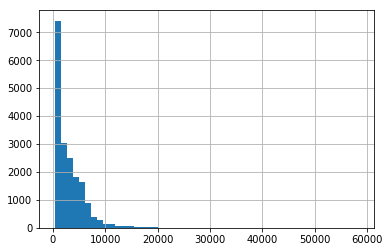

In [8]:
dataset["content_size"].hist(bins=50);

In [9]:
dataset["content_size"].describe()

count    18612.000000
mean      3071.807006
std       3401.495149
min        301.000000
25%        685.000000
50%       2179.000000
75%       4447.000000
max      58442.000000
Name: content_size, dtype: float64

Cleaning publication names

In [10]:
def clean_publication(publication):
    # Leaving only the domain
    return re.sub(r"(https?://)?(www([0-9])?\.)?", "", publication)

In [11]:
cleaned_publication = dataset["publication"].apply(clean_publication)

In [12]:
dataset["publication"] = cleaned_publication

Publications by number of articles

In [13]:
publications = dataset.groupby("publication").count()["title"]

Publications with more that 15 articles and less than 1000 articles. It was notices that some news sources are spamming the list of articles.

In [14]:
mask_publication = (publications > 15) & (publications < 1000)
selected_publications = publications[mask_publication]

In [15]:
selected_publications.sort_values(ascending=False).head()

publication
wsj.com              925
npr.org              874
thedailybeast.com    869
cbn.com              766
foxnews.com          689
Name: title, dtype: int64

In [16]:
dataset = dataset[dataset["publication"].isin(selected_publications.index)]

In [17]:
dataset.shape

(11871, 9)